https://wikidocs.net/49633

In [1]:
from sklearn.datasets import load_digits


In [35]:
digits = load_digits()

In [36]:
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

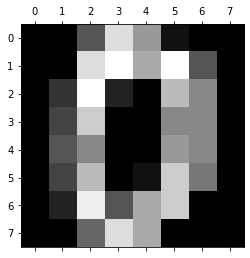

In [37]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])

In [38]:
type(digits)

sklearn.utils.Bunch

In [39]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [40]:
import pandas as pd # 데이터 프레임으로 변환을 위해 임포트
import numpy as np # 고수학 연산을 위해 임포트

# feature_names 와 target을 레코드로 갖는 데이터프레임 생성
df = pd.DataFrame(data=digits.data, columns=digits.feature_names)

x_data = df
df['target'] = digits.target
y_data = df['target']
df.head()


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [41]:
df['target'].head()

0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

estimator = SVC(kernel='linear', C=1.0) #linear SVM

In [43]:
estimator.fit(x_train, y_train)

SVC(kernel='linear')

In [44]:
y_predict = estimator.predict(x_train) 
score = accuracy_score(y_train, y_predict)
print(score) #1.0

y_predict = estimator.predict(x_test) 
score = accuracy_score(y_test, y_predict)
print(score) #1.0


1.0
0.9944444444444445


In [45]:
y_predict = estimator.decision_function(x_test)
print(y_predict)

[[ 1.70738976  4.88240565  9.30468331 ...  0.69611281  7.30760078
   2.70325225]
 [ 7.27424588  4.8187814   1.71006796 ...  7.28504917  4.26479948
   0.69496361]
 [ 3.77908989  0.69847609 -0.30160185 ...  2.71371526  7.28351156
   7.27037277]
 ...
 [-0.30769188  4.12657499  4.09785814 ...  5.75489624  8.30583842
   3.74128212]
 [-0.26588369  2.74923769  0.71014022 ...  3.73514941  9.31092177
   8.29742983]
 [ 1.81514046  9.30283158  3.7270524  ...  2.74244601  4.88017991
   7.30410965]]
